In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def localMaxMin(data):
    maxima = []
    minima = []
    
    for i in range(1, len(data)-1):
        if data[i] > data[i-1] and data[i] > data[i+1]:
            maxima.append(i)
        elif data[i] < data[i-1] and data[i] < data[i+1]:
            minima.append(i)
            
    return maxima, minima

In [6]:
def findForexPatterns(data):
    maxima, minima = localMaxMin(data)
    
    #bullish double bottom
    bullish_double_bottom = [minima[i] for i in range(1, len(minima)-2) if 
                             data[minima[i-1]] > data[minima[i]] and
                             data[minima[i+1]] > data[minima[i]] and
                             data[minima[i+2]] > data[minima[i+1]]]
    
    if bullish_double_bottom:
        print("Bullish double bottom pattern detected at index ", bullish_double_bottom)
    
    #bearish double top pattern
    bearish_double_top = [maxima[i] for i in range(1, len(maxima)-2) if 
                          data[maxima[i-1]] < data[maxima[i]] and 
                          data[maxima[i+1]] < data[maxima[i]] and 
                          data[maxima[i+2]] < data[maxima[i+1]]]
    
    if bearish_double_top:
        print("Bearish double top pattern detected at index ", bearish_double_top)
   
        
        
    #Bullish inverted head and shoulders pattern
    bullish_inverted_head_and_shoulders = [minima[i] for i in range(1, len(minima)-2) if 
                                            data[minima[i-1]] > data[minima[i]] and 
                                            data[maxima[i]] < data[maxima[i+1]] and 
                                            data[minima[i+1]] > data[minima[i+2]]]
    
    if bullish_inverted_head_and_shoulders:
        print("Bullish inverted head and shoulders pattern detected at index ", bullish_inverted_head_and_shoulders)
    
    #Bearish head and shoulders pattern
    bearish_head_and_shoulders = [maxima[i] for i in range(1, len(maxima)-2) if 
                                  data[maxima[i-1]] < data[maxima[i]] and 
                                  data[minima[i]] > data[minima[i+1]] and 
                                  data[maxima[i+1]] < data[maxima[i+2]]]
    
    if bearish_head_and_shoulders:
        print("Bearish head and shoulders pattern detected at index ", bearish_head_and_shoulders)
    
    #Bullish triple bottom pattern
    bullish_triple_bottom = [minima[i] for i in range(1, len(minima)-3) if 
                             data[minima[i-1]] > data[minima[i]] and 
                             data[minima[i]] < data[minima[i+1]] and 
                             data[minima[i+1]] > data[minima[i+2]] and 
                             data[minima[i+2]] < data[minima[i+3]]]
    
    if bullish_triple_bottom:
        print("Bullish triple bottom pattern detected at index ", bullish_triple_bottom)
    
    #Bearish triple top pattern
    bearish_triple_top = [maxima[i] for i in range(1, len(maxima)-3) if 
                          data[maxima[i-1]] < data[maxima[i]] and 
                          data[maxima[i]] > data[maxima[i+1]] and 
                          data[maxima[i+1]] < data[maxima[i+2]] and 
                          data[maxima[i+2]] > data[maxima[i+3]]]
    
    if bearish_triple_top:
        print("Bearish triple top pattern detected at index ", bearish_triple_top)


Bullish double bottom pattern detected at index  [15, 80, 89]
Bearish double top pattern detected at index  [35, 61]
Bullish inverted head and shoulders pattern detected at index  [11, 52]
Bearish head and shoulders pattern detected at index  [14, 74, 87]
Bullish triple bottom pattern detected at index  [11, 52, 59, 64]
Bearish triple top pattern detected at index  [29, 69]


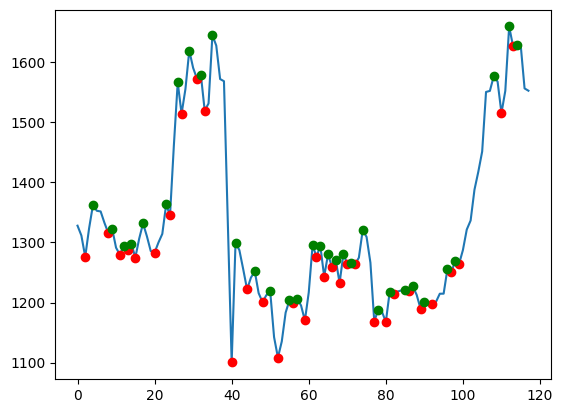

In [7]:
data = pd.read_csv('ETH-USD_1d.csv')

maxima, minima = localMaxMin(data['Close'])
findForexPatterns(data['Close'])

plt.plot(data['Close'])
plt.plot(minima, data['Close'][minima], 'ro')
plt.plot(maxima, data['Close'][maxima], 'go')

plt.show()